In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('timesheets.csv')

df

,EMAIL,START_DATE,END_DATE,MON,TUE,WED,THUR,FRI,SAT,SUN,TOTAL,NAME
0,colin06@example.com,2024-05-27,2024-06-02,8,8,4,5,7,0,0,32,bench
1,bryanbilly@example.org,2024-05-27,2024-06-02,14,15,15,14,15,5,11,89,SkyLabs
2,rebecca13@example.org,2024-05-27,2024-06-02,9,6,4,6,6,4,3,38,NexGen Solutions
3,arjunprakash027@gmail.com,2024-05-27,2024-06-02,7,8,6,4,5,0,0,30,bench
4,olivia18@example.net,2024-05-27,2024-06-02,9,7,4,16,10,2,2,50,SwiftEdge
...,...,...,...,...,...,...,...,...,...,...,...,...
1349,brooksdaniel@example.net,2024-01-08,2024-01-14,6,6,6,4,8,0,0,30,bench
1350,bernard91@example.org,2024-01-29,2024-02-04,4,6,8,5,5,0,0,28,bench
1351,brooksdaniel@example.net,2024-01-29,2024-02-04,7,5,6,5,8,0,0,31,bench
1352,lindacastro@example.com,2024-01-22,2024-01-28,7,8,6,4,4,0,0,29,bench


In [109]:
total_value_df = df.drop(columns=['TOTAL']) 
total_value_df.set_index('EMAIL', inplace=True)
total_value_df.iloc[0]

START_DATE    2024-05-27
END_DATE      2024-06-02
MON                    8
TUE                    8
WED                    4
THUR                   5
FRI                    7
SAT                    0
SUN                    0
NAME               bench
Name: colin06@example.com, dtype: object

In [111]:
unique_emails = total_value_df.index.get_level_values('EMAIL').unique()
unique_emails

Index(['colin06@example.com', 'bryanbilly@example.org',
       'rebecca13@example.org', 'arjunprakash027@gmail.com',
       'olivia18@example.net', 'ofreeman@example.net', 'imartinez@example.com',
       'aiyogeshg@gmail.com', 'brownamanda@example.com', 'qfisher@example.org',
       'qvasquez@example.com', 'adamsdana@example.net', 'lauren23@example.net',
       'littlejanice@example.org', 'jonathan46@example.com',
       'kimcollin@example.net', 'wmorrison@example.org', 'jason84@example.net',
       'lhurst@example.net', 'kenneth86@example.net',
       'weaverraven@example.com', 'hernandezscott@example.com',
       'rodriguezallen@example.com', 'pleblanc@example.com',
       'marco07@example.net', 'rodriguezdestiny@example.org',
       'gregory78@example.org', 'thompsonanthony@example.org',
       'cindy46@example.org', 'christopherbrown@example.org',
       'zacharylawrence@example.com', 'ibanks@example.org',
       'jorgeblack@example.com', 'shawn85@example.net', 'kevin85@example.net

In [122]:
total_value_df_email = total_value_df.loc['bernard91@example.org']
total_value_df_email.iterrows()

for i,j in total_value_df_email.iterrows():
    j.drop(['START_DATE', 'END_DATE'], inplace=True)
    print(j)

MON           10
TUE           10
WED            8
THUR          10
FRI            8
SAT            7
SUN            6
NAME    TechNova
Name: bernard91@example.org, dtype: object
MON            7
TUE            7
WED           10
THUR           4
FRI            5
SAT            0
SUN            3
NAME    TechNova
Name: bernard91@example.org, dtype: object
MON           4
TUE           4
WED           5
THUR          6
FRI           4
SAT           1
SUN           3
NAME    SkyLabs
Name: bernard91@example.org, dtype: object
MON           6
TUE          10
WED           5
THUR          5
FRI          10
SAT           1
SUN           1
NAME    SkyLabs
Name: bernard91@example.org, dtype: object
MON          11
TUE          10
WED           9
THUR         11
FRI          10
SAT           4
SUN           5
NAME    SkyLabs
Name: bernard91@example.org, dtype: object
MON            4
TUE            6
WED            4
THUR           6
FRI            8
SAT            1
SUN            0
NAME    Te

In [127]:
dfs = []
for email in unique_emails:
    total_value_df_email = total_value_df.loc[email]
    new_row_data = {'EMAIL':[email]}
    for index,row in total_value_df_email.iterrows():
        original_date = pd.to_datetime(row['START_DATE'])
        new_dates = [original_date + pd.DateOffset(days=i) for i in range(7)]
        day = 0
        row.drop(['START_DATE', 'END_DATE','NAME'], inplace=True)
        for index,val in row.items():
            
            new_row_data[new_dates[day].strftime('%Y-%m-%d')] = [val]
            day+=1
        
    df_total = pd.DataFrame(new_row_data,index=[0])
    dfs.append(df_total)

master_df = pd.concat(dfs, ignore_index=True)
master_df

,EMAIL,2024-05-27,2024-05-28,2024-05-29,2024-05-30,2024-05-31,2024-06-01,2024-06-02,2024-05-20,2024-05-21,...,2024-02-23,2024-02-24,2024-02-25,2024-01-22,2024-01-23,2024-01-24,2024-01-25,2024-01-26,2024-01-27,2024-01-28
0,colin06@example.com,8,8,4,5,7,0,0,6,5,...,7,0,0,5,4,7,5,5,0,0
1,bryanbilly@example.org,14,15,15,14,15,5,11,13,7,...,4,0,0,5,5,7,7,4,0,0
2,rebecca13@example.org,9,6,4,6,6,4,3,14,12,...,5,0,0,7,6,7,7,5,0,0
3,arjunprakash027@gmail.com,7,8,6,4,5,0,0,7,8,...,5,0,0,4,7,6,6,4,0,0
4,olivia18@example.net,9,7,4,16,10,2,2,18,14,...,5,0,0,7,4,5,4,8,0,0
5,ofreeman@example.net,5,4,6,6,4,3,3,5,5,...,6,0,0,5,8,7,6,5,0,0
6,imartinez@example.com,17,12,16,18,14,6,12,12,19,...,7,0,0,6,5,4,4,7,0,0
7,aiyogeshg@gmail.com,12,11,6,11,12,0,1,12,10,...,6,0,0,7,7,7,4,4,0,0
8,brownamanda@example.com,6,6,8,5,8,0,0,4,7,...,8,0,0,5,5,8,5,7,0,0
9,qfisher@example.org,20,16,16,16,11,2,4,16,16,...,4,0,0,4,7,5,6,7,0,0


In [149]:
master_df_T = master_df.T
master_df_T.reset_index(inplace=True)

master_df_T.columns = master_df_T.iloc[0]

master_df_T = master_df_T.iloc[1:]
master_df_T.reset_index(drop=True,inplace=True)

master_df_T = master_df_T.set_index("EMAIL")
master_df_T.index = pd.to_datetime(master_df_T.index)
master_df_T = master_df_T.sort_index()

In [150]:
master_df_T

,colin06@example.com,bryanbilly@example.org,rebecca13@example.org,arjunprakash027@gmail.com,olivia18@example.net,ofreeman@example.net,imartinez@example.com,aiyogeshg@gmail.com,brownamanda@example.com,qfisher@example.org,...,kevin63@example.net,whitney41@example.org,jcampbell@example.net,psingh@example.org,charlesjames@example.org,ykerr@example.com,sherimiles@example.net,brooksdaniel@example.net,jamesstephens@example.com,bernard91@example.org
EMAIL,,,,,,,,,,,,,,,,,,,,,
2024-01-01,4,7,8,8,6,8,4,6,4,6,...,7,8,5,8,8,4,7,7,6,8
2024-01-02,7,8,5,6,4,4,7,5,7,5,...,4,5,8,4,6,5,8,4,7,8
2024-01-03,6,8,7,5,8,4,4,6,8,7,...,6,7,8,4,6,8,5,7,5,4
2024-01-04,7,6,7,5,5,5,8,8,8,7,...,8,4,6,8,7,8,5,6,7,5
2024-01-05,5,5,5,8,6,4,6,5,7,4,...,5,7,7,7,4,8,7,4,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-29,4,15,4,6,4,6,16,6,8,16,...,15,9,17,6,17,16,6,14,5,5
2024-05-30,5,14,6,4,16,6,18,11,5,16,...,17,4,14,7,15,13,5,16,5,6
2024-05-31,7,15,6,5,10,4,14,12,8,11,...,15,8,15,7,14,15,6,12,6,4


In [151]:
from prophet import Prophet

/home/arjunrao/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [166]:
df = master_df_T[[master_df_T.columns[0]]]
df


,colin06@example.com
EMAIL,
2024-01-01,4
2024-01-02,7
2024-01-03,6
2024-01-04,7
2024-01-05,5
...,...
2024-05-29,4
2024-05-30,5
2024-05-31,7


In [167]:
df.reset_index(inplace=True)
df = df.rename(columns={"EMAIL":"ds","colin06@example.com":"y"})


In [168]:
df

,ds,y
0,2024-01-01,4
1,2024-01-02,7
2,2024-01-03,6
3,2024-01-04,7
4,2024-01-05,5
...,...,...
149,2024-05-29,4
150,2024-05-30,5
151,2024-05-31,7
152,2024-06-01,0


In [169]:
m = Prophet()
m.fit(df)

00:38:10 - cmdstanpy - INFO - Chain [1] start processing
00:38:10 - cmdstanpy - INFO - Chain [1] done processing


In [170]:
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
169,2024-06-18
170,2024-06-19
171,2024-06-20
172,2024-06-21
173,2024-06-22


In [171]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
169,2024-06-18,5.265042,1.771705,8.581849
170,2024-06-19,5.117561,1.854442,8.547046
171,2024-06-20,4.607227,1.584728,8.104822
172,2024-06-21,4.551938,0.955057,7.848802
173,2024-06-22,-2.318458,-5.642484,1.013640


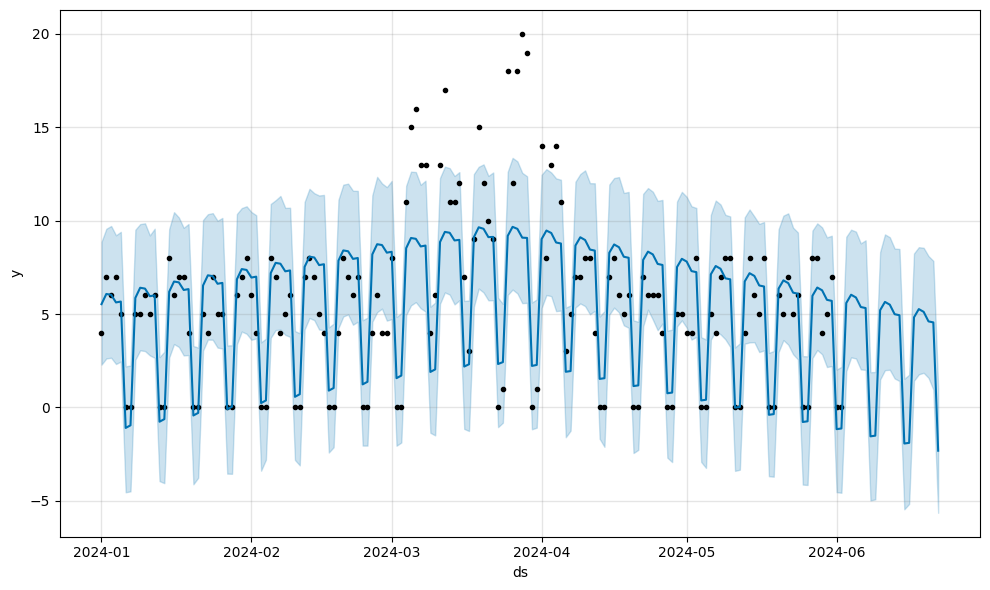

In [172]:
fig1 = m.plot(forecast)



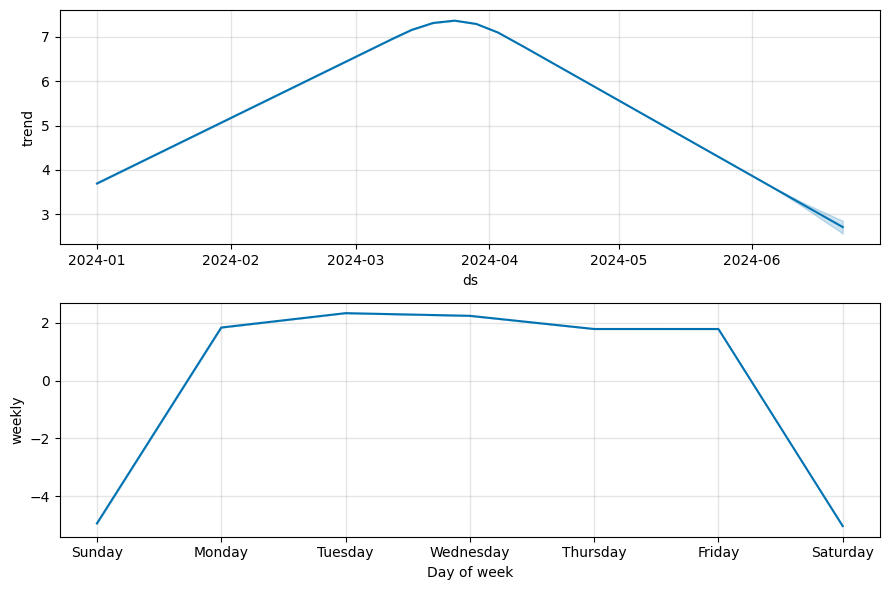

In [173]:
fig2 = m.plot_components(forecast)

